In [1]:
import wave
import json
import librosa
import csv
import numpy as np
from pywt import wavedec
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

2023-11-17 16:10:56.609501: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 16:10:56.651635: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 16:10:56.651681: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 16:10:56.651704: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 16:10:56.658571: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 16:10:56.659097: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
model_uri = '../modelh5/RNN_KFold4.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (None, 112, 64)           4224      
                                                                 
 dense_52 (Dense)            (None, 112, 32)           2080      
                                                                 
 flatten_13 (Flatten)        (None, 3584)              0         
                                                                 
 dense_53 (Dense)            (None, 64)                229440    
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dense_55 (Dense)            (None, 5)                 165       
                                                                 
Total params: 237989 (929.64 KB)
Trainable params: 23

In [3]:
# import wave
# import json
# header = 'filename'
# for i in range(1, 41):
#     header += f' mfcc{i}'
# for i in range(1, 13):
#   header += f' chroma{i}'
# for i in range(1, 61):
#   header += f' cqt{i}'
# header += ' label'
# header = header.split()
# file = open('testing.csv', 'w', newline='')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)



In [4]:
# dataset_path = '../data/testing_10/'

In [5]:
# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#             semantic_label = dirpath.split("/")[-1]
#             print("\nProcessing: {}".format(semantic_label))
#             for f in filenames:
#                 file_path = os.path.join(dirpath, f)
#                 to_append = f'{file_path}'
#                 # print(file_path)
#                 y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#                 coeffs = wavedec(y, 'db1', level=10)
#                 cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
#                 mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#                 rms = librosa.feature.chroma_stft(y=cD1, sr=8000)
#                 cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60))
#                 combined_features = np.concatenate((mfcc, rms, cqt), axis=0)
#                 to_append = f'{file_path}'
#                 for e in combined_features:
#                     to_append += f' {np.mean(e.T, axis=0)}'
#                 to_append += f' {semantic_label}'
#                 file = open('testing.csv', 'a', newline='')
#                 with file:
#                     writer = csv.writer(file)
#                     writer.writerow(to_append.split())




In [6]:
data = pd.read_csv('./testing.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/testing_10/MVP/New_MVP_135.wav,-409.528564,87.384094,26.037184,-19.667170,-30.942360,-22.674948,-22.804028,-23.051409,-34.245644,...,0.002009,0.001601,0.001465,0.001038,0.000982,0.000833,0.000616,0.000510,0.000491,MVP
1,../data/testing_10/MVP/New_MVP_192.wav,-337.002411,89.271080,14.186399,1.686405,-6.657608,-13.926779,-20.226974,-19.441204,-17.915880,...,0.002848,0.002626,0.003480,0.003186,0.003180,0.002202,0.001917,0.002559,0.002665,MVP
2,../data/testing_10/MVP/New_MVP_179.wav,-407.230621,70.930885,-13.684482,-34.369339,-21.889259,-15.245199,-11.328670,-9.168187,-16.146969,...,0.004742,0.004964,0.003947,0.003980,0.003126,0.003334,0.002728,0.002642,0.002220,MVP
3,../data/testing_10/MVP/New_MVP_165.wav,-406.872314,84.138229,27.318718,-15.585702,-28.959631,-22.787647,-22.402174,-23.848078,-31.116653,...,0.003096,0.002835,0.002835,0.002727,0.002162,0.001437,0.000839,0.000807,0.000667,MVP
4,../data/testing_10/MVP/New_MVP_024.wav,-479.023804,89.486000,8.549840,-0.640211,-7.605422,-15.150332,-16.487503,-13.620892,-10.753409,...,0.002732,0.001242,0.000721,0.001375,0.002052,0.002141,0.001541,0.000922,0.001057,MVP


In [7]:
X = data.drop(['label', 'filename'], axis=1)
y = data.iloc[:, -1]

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = tf.keras.models.load_model(model_uri)
pred = model.predict(X)
hasil = []
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
# class_labels = ['MVP', 'MS', 'N', 'MR', 'AS']
for i in pred:
    # hasil.append(np.argmax(i))
    print('===')
    print(i)
    cek = np.argmax(i)
    print(f'Actual class: {cek}')
    print(f'Predicted class: {class_labels[cek]}')
    print('===')
    hasil.append(class_labels[cek])
y_p = np.argmax(pred, axis=1)


4/4 [==============================] - 0s 5ms/step
===
[2.6166550e-04 2.4502802e-05 4.9552541e-06 9.9970055e-01 8.3547011e-06]
Actual class: 3
Predicted class: MVP
===
===
[4.7006077e-01 4.2000048e-02 1.3553812e-01 3.5238206e-01 1.9017472e-05]
Actual class: 0
Predicted class: AS
===
===
[1.7500076e-02 2.0208329e-01 2.3064855e-04 7.8018516e-01 9.3476069e-07]
Actual class: 3
Predicted class: MVP
===
===
[8.7070009e-03 1.1705867e-03 1.1036047e-04 9.8957068e-01 4.4136192e-04]
Actual class: 3
Predicted class: MVP
===
===
[1.3024650e-03 5.5251858e-04 1.2797791e-02 6.1548418e-01 3.6986303e-01]
Actual class: 3
Predicted class: MVP
===
===
[1.1607547e-04 2.5924389e-06 2.3487255e-06 9.9984908e-01 2.9884597e-05]
Actual class: 3
Predicted class: MVP
===
===
[2.4966974e-02 1.4004047e-04 1.7542470e-03 9.7288650e-01 2.5208679e-04]
Actual class: 3
Predicted class: MVP
===
===
[1.6742036e-03 1.3480717e-04 7.6716220e-05 9.9801803e-01 9.6288692e-05]
Actual class: 3
Predicted class: MVP
===
===
[0.0021888

In [9]:
cm = confusion_matrix(y, hasil)
cm

array([[20,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 1,  0, 18,  1,  0],
       [ 1,  1,  0, 17,  1],
       [ 0,  0,  0,  0, 20]])

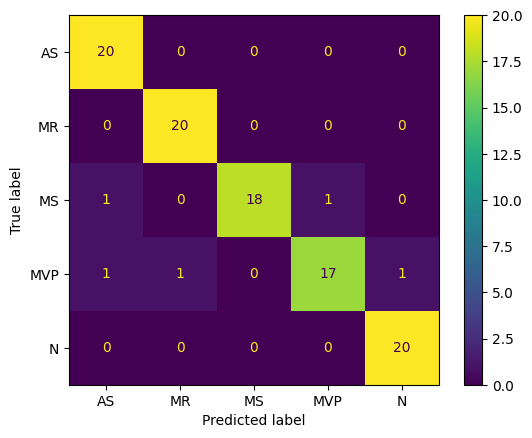

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [11]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [12]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [13]:
print("Sensitivity :" , TPR, 'mean: ', np.mean(TPR))
print("Specificity :" , TNR, 'mean: ', np.mean(TNR))
print("Precision :" , PPV, 'mean: ', np.mean(PPV))
print("Accuracy :" , ACC, 'mean: ', np.mean(ACC))
print("FPR :" , FPR, 'mean: ', np.mean(FPR))
print("FNR :" , FNR, 'mean: ', np.mean(FNR))
print("NPV :" , NPV, 'mean: ', np.mean(NPV))
print("FDR :" , FDR, 'mean: ', np.mean(FDR))
print("f1_score:", 2 * (PPV * TPR) / (PPV + TPR), 'mean: ', np.mean(2 * (PPV * TPR) / (PPV + TPR)))


Sensitivity : [1.   1.   0.9  0.85 1.  ] mean:  0.95
Specificity : [0.975  0.9875 1.     0.9875 0.9875] mean:  0.9875
Precision : [0.90909091 0.95238095 1.         0.94444444 0.95238095] mean:  0.9516594516594516
Accuracy : [0.98 0.99 0.98 0.96 0.99] mean:  0.9800000000000001
FPR : [0.025  0.0125 0.     0.0125 0.0125] mean:  0.0125
FNR : [0.   0.   0.1  0.15 0.  ] mean:  0.05
NPV : [1.         1.         0.97560976 0.96341463 1.        ] mean:  0.9878048780487806
FDR : [0.09090909 0.04761905 0.         0.05555556 0.04761905] mean:  0.04834054834054834
f1_score: [0.95238095 0.97560976 0.94736842 0.89473684 0.97560976] mean:  0.9491411455467939
